# 📘 Para-Procesimi i të Dhënave për Analizë
## Tema: Analiza e të dhënave të shitjeve (Superstore Dataset)

Ky notebook përmban hapat e detajuar të para-procesimit për dataset-in **Superstore**.
Procesi përfshin:
- Ngarkimin dhe inspektimin e të dhënave
- Trajtimin e tipeve të dhënave dhe vlerave të zbrazëta
- Pastrimin, agregimin dhe mostrimin
- Diskretizimin, binarizimin dhe transformimet
- Reduktimin e dimensioneve me PCA

**👩‍🎓 Studentja:** Anjeza Sfishta  <br>
**📚 Lënda:** Përgatitja dhe vizualizimi i të dhënave  

##  Importimi i librarive
Në këtë seksion importojmë libraritë kryesore që do të përdorim gjatë para-procesimit.


In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, Binarizer, KBinsDiscretizer
from sklearn.decomposition import PCA
plt.rcParams['font.family'] = 'DejaVu Sans'  # Font i paracaktuar dhe Unicode-kompatibil
from scipy import stats

print('Pandas version:', pd.__version__)
print('Seaborn version:', sns.__version__)

Pandas version: 2.2.2
Seaborn version: 0.13.2


## Ngarkimi i të dhënave
Lexojmë dataset-in dhe shikojmë rreshtat e parë për të kuptuar strukturën e tij.


In [119]:
df = pd.read_csv('superstore.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


##  Inspektimi dhe cilësia e të dhënave
Analizojmë tipet, mungesat dhe statistikat për të vlerësuar cilësinë e dataset-it.


In [120]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

##  Pastrimi i të dhënave
Heqim duplikatet dhe rreshtat me vlera të zbrazëta, si dhe konvertojmë kolonat e datës në formatin e duhur.


In [121]:
df = df.drop_duplicates()
#df = df.dropna()
for col in ['Sales']:
    df[col] = df[col].fillna(df[col].median())
    
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

invalid_dates = df[df['Order Date'].isna() | df['Ship Date'].isna()]
print(f"Rreshta me data të pavlefshme: {len(invalid_dates)}")



Rreshta me data të pavlefshme: 7124


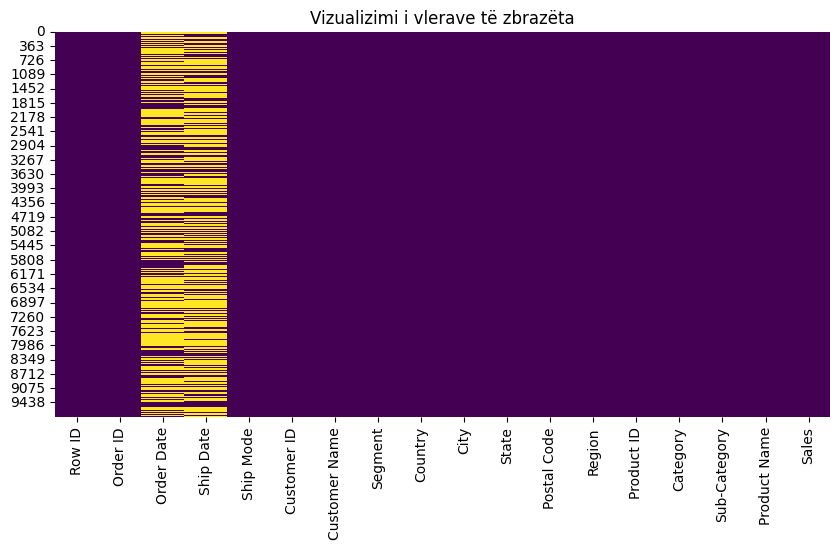

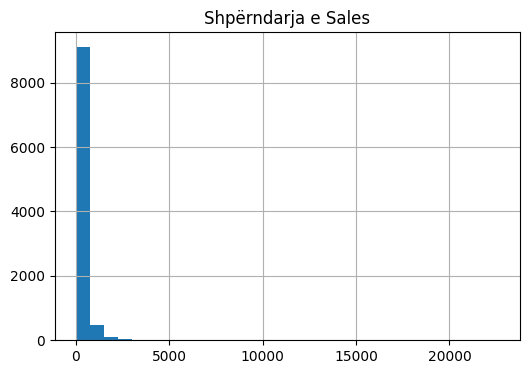

In [122]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Vizualizimi i vlerave të zbrazëta')
plt.show()

df[['Sales']].hist(bins=30, figsize=(6,4))
plt.title('Shpërndarja e Sales')
plt.show()

In [123]:
# Heq rreshtat ku datat janë NaT
df = df.dropna(subset=['Order Date', 'Ship Date'])
print(f"Numri i rreshtave pas heqjes së datave të pavlefshme: {len(df)}")


print("✅ Të dhënat u pastruan dhe datat u konvertuan me sukses!")

Numri i rreshtave pas heqjes së datave të pavlefshme: 2676
✅ Të dhënat u pastruan dhe datat u konvertuan me sukses!


##  Diskretizimi, Binarizimi dhe Standardizimi
Kryejmë:
- **Diskretizimin** e kolonës `Sales` në 4 intervale  
- **Binarizimin** e kolonës `Sales` për të ndarë fitimet nga humbjet  
- **Standardizimin** e kolonave numerike për t’i sjellë në një shkallë të përbashkët


In [124]:
# Diskretizimi i kolonës 'Sales' në 4 intervale
disc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
df['Sales_binned'] = disc.fit_transform(df[['Sales']])
print("Kufijtë e intervaleve për Sales:", disc.bin_edges_)


# Binarizimi i kolonës 'Sales' sipas mesatares (1 = Shitje e lartë, 0 = Shitje e ulët)
threshold = df['Sales'].mean()
binarizer = Binarizer(threshold=threshold)
df['Sales_binary'] = binarizer.fit_transform(df[['Sales']])

# Standardizimi i kolonave numerike
scaler = StandardScaler()
df['Sales_original'] = df['Sales']  # ruaj vlerat para standardizimit
df[['Sales']] = scaler.fit_transform(df[['Sales']])

print("✅ Diskretizimi, binarizimi dhe standardizimi u kryen me sukses!")
df[['Sales', 'Sales_binned', 'Sales_binary']].head()


Kufijtë e intervaleve për Sales: [array([5.560000e-01, 1.793500e+01, 5.824000e+01, 2.011340e+02,
        1.749995e+04])                                         ]
✅ Diskretizimi, binarizimi dhe standardizimi u kryen me sukses!


,Sales,Sales_binned,Sales_binary
0,0.048399,3.0,1.0
1,0.792189,3.0,1.0
13,0.279484,3.0,1.0
35,1.370794,3.0,1.0
36,-0.064029,2.0,0.0


##  Correlation Matrix për kolonat numerike


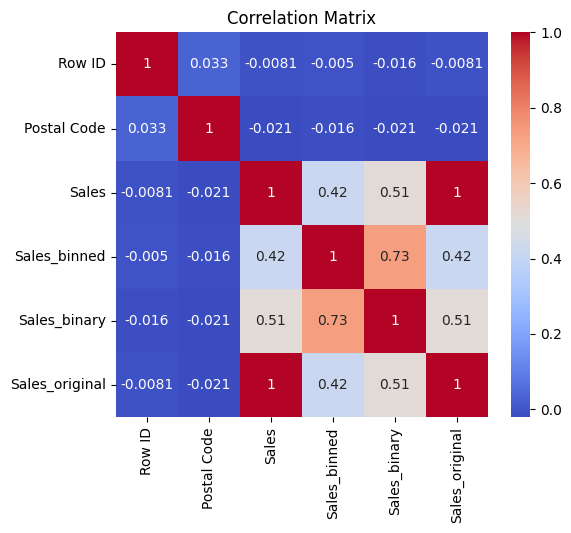

In [125]:
# Gjej kolonat numerike automatikisht
num_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(6,5))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


##  Reduktimi i dimensioneve me PCA
Përdorim **PCA (Principal Component Analysis)** për të reduktuar dimensionet e të dhënave dhe për të vizualizuar strukturën e tyre.


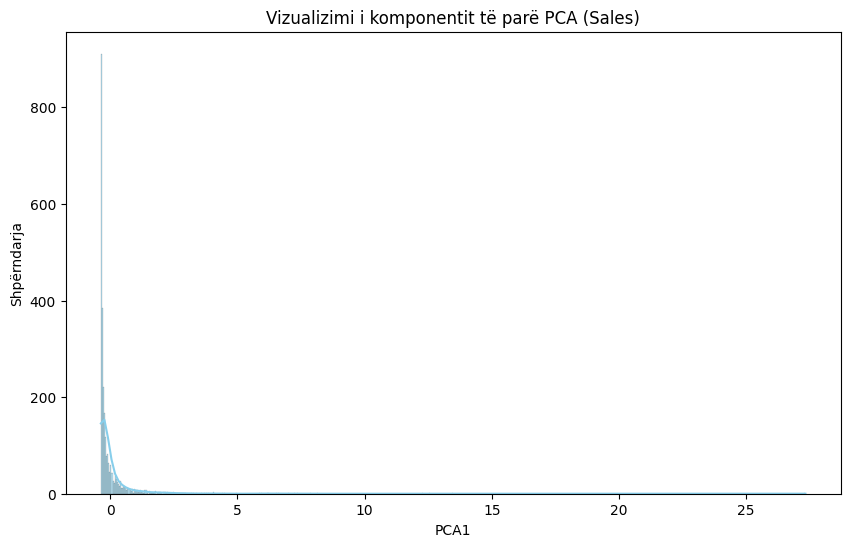

Varianca e kapur nga PCA1: 1.00


In [126]:
pca = PCA(n_components=1)
pca_data = pca.fit_transform(df[['Sales']])
df['PCA1'] = pca_data[:, 0]

plt.figure(figsize=(10,6))
sns.histplot(df['PCA1'], kde=True, color='skyblue', alpha=0.6)
plt.title('Vizualizimi i komponentit të parë PCA (Sales)')
plt.xlabel('PCA1')
plt.ylabel('Shpërndarja')
plt.show()

explained_variance = pca.explained_variance_ratio_[0]
print(f"Varianca e kapur nga PCA1: {explained_variance:.2f}")

##  Krijimi i veçorive të reja
Shtohet veçoria e re `Delivery_Days` që tregon kohën e dërgesës për çdo porosi.


In [127]:
df['Delivery_Days'] = (df['Ship Date'] - df['Order Date']).dt.days
df[['Order Date', 'Ship Date', 'Delivery_Days']].head()

,Order Date,Ship Date,Delivery_Days
0,2017-08-11,2017-11-11,92
1,2017-08-11,2017-11-11,92
13,2017-05-12,2017-10-12,153
35,2017-08-12,2017-10-12,61
36,2017-08-12,2017-10-12,61


##  Mostrim dhe Agregim i të Dhënave

Në këtë seksion do të kryejmë disa analiza përmbledhëse duke përdorur funksione të tilla si:
- `groupby()` për të grupuar të dhënat sipas kategorive ose rajoneve
- `agg()` për të llogaritur mesatare, total dhe numërime
- `sample()` për të marrë mostra të rastësishme nga dataset-i

Këto analiza ndihmojnë për të kuptuar shpërndarjen e shitjeve dhe fitimeve sipas rajonit, kategorisë ose segmentit të klientit.


 Shembuj Praktikë

1. Mostrim i rastësishëm (10% e dataset-it)

In [128]:
sample_size = int(0.1 * len(df))  # 10% e dataset-it
print(f"Mostër e rastësishme (10% e dataset-it): {sample_size} rreshta")
display(df.sample(sample_size))



Mostër e rastësishme (10% e dataset-it): 267 rreshta


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Sales_binned,Sales_binary,Sales_original,PCA1,Delivery_Days
127,128,US-2018-107272,2018-05-11,2018-12-11,Standard Class,TS-21610,Troy Staebel,Consumer,United States,Phoenix,...,OFF-ST-10002974,Office Supplies,Storage,"Trav-L-File Heavy-Duty Shuttle II, Black",0.019963,3.0,1.0,243.992,0.019963,214
9163,9164,CA-2016-164007,2016-08-06,2016-12-06,Standard Class,MG-17695,Maureen Gnade,Consumer,United States,Chicago,...,TEC-AC-10003433,Technology,Accessories,Maxell 4.7GB DVD+R 5/Pack,-0.362419,0.0,0.0,2.376,-0.362419,122
4035,4036,US-2017-108777,2017-12-12,2017-12-12,Same Day,JM-15655,Jim Mitchum,Corporate,United States,Lorain,...,TEC-AC-10002567,Technology,Accessories,Logitech G602 Wireless Gaming Mouse,0.241463,3.0,1.0,383.952,0.241463,0
5201,5202,CA-2017-103982,2017-03-03,2017-08-03,Standard Class,AA-10315,Alex Avila,Consumer,United States,Round Rock,...,TEC-AC-10002857,Technology,Accessories,Verbatim 25 GB 6x Blu-ray Single Layer Recorda...,-0.300153,1.0,0.0,41.720,-0.300153,153
932,933,CA-2018-114216,2018-02-09,2018-06-09,Standard Class,RK-19300,Ralph Kennedy,Consumer,United States,Philadelphia,...,OFF-PA-10002195,Office Supplies,Paper,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",-0.346884,0.0,0.0,12.192,-0.346884,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8838,8839,CA-2015-153808,2015-06-04,2015-10-04,Second Class,FH-14275,Frank Hawley,Corporate,United States,Los Angeles,...,OFF-AR-10001725,Office Supplies,Art,Boston Home & Office Model 2000 Electric Penci...,-0.253894,2.0,0.0,70.950,-0.253894,122
6845,6846,CA-2015-147543,2015-06-07,2015-12-07,Standard Class,BC-11125,Becky Castell,Home Office,United States,El Cajon,...,FUR-CH-10000155,Furniture,Chairs,Global Comet Stacking Armless Chair,0.391063,3.0,1.0,478.480,0.391063,183
7443,7444,CA-2015-109932,2015-09-12,2015-11-12,First Class,VP-21760,Victoria Pisteka,Corporate,United States,Brownsville,...,OFF-ST-10000036,Office Supplies,Storage,Recycled Data-Pak for Archival Bound Computer ...,0.009049,3.0,1.0,237.096,0.009049,61
4746,4747,CA-2018-168123,2018-05-03,2018-05-03,Same Day,JD-16060,Julia Dunbar,Consumer,United States,Rochester,...,OFF-BI-10001097,Office Supplies,Binders,Avery Hole Reinforcements,-0.336600,1.0,0.0,18.690,-0.336600,0


2. Mesatarja e shitjeve dhe fitimit sipas Rajonit

In [129]:
print("\nMesatarja e shitjeve dhe fitimit sipas Rajonit:")
region_summary = df.groupby('Region')[['Sales']].mean().reset_index()
display(region_summary)


Mesatarja e shitjeve dhe fitimit sipas Rajonit:


,Region,Sales
0,Central,0.000631
1,East,-0.005645
2,South,0.030613
3,West,-0.012253


3. Totali i shitjeve dhe fitimit sipas Kategorisë së Produktit

In [130]:
print("\nTotali i shitjeve dhe fitimit sipas Kategorisë së Produktit:")
category_summary = df.groupby('Category')[['Sales',]].sum().reset_index()
display(category_summary)


Totali i shitjeve dhe fitimit sipas Kategorisë së Produktit:


,Category,Sales
0,Furniture,105.714817
1,Office Supplies,-318.252309
2,Technology,212.537493


4. Numri i porosive sipas Segmentit të Klientit

In [131]:
print("\nNumri i porosive sipas Segmentit të Klientit:")
segment_orders = df['Segment'].value_counts().reset_index()
segment_orders.columns = ['Segment', 'Numri i Porosive']
display(segment_orders)


Numri i porosive sipas Segmentit të Klientit:


,Segment,Numri i Porosive
0,Consumer,1389
1,Corporate,778
2,Home Office,509


5. Vizualizim grafik i shitjeve mesatare sipas Rajonit

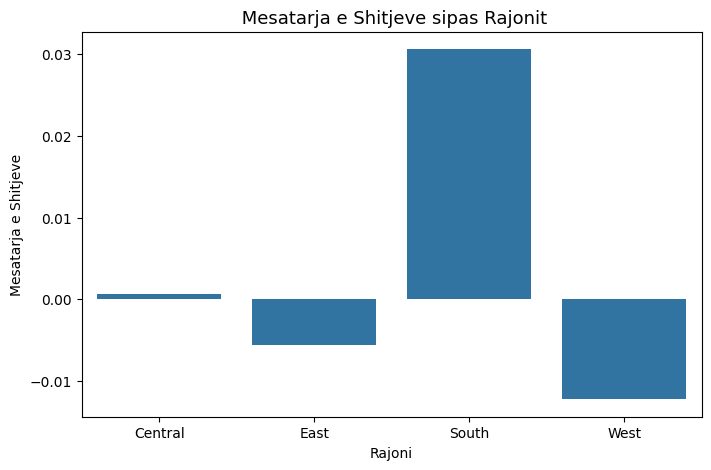

In [132]:
plt.figure(figsize=(8,5))
sns.barplot(data=region_summary, x='Region', y='Sales')
plt.title(" Mesatarja e Shitjeve sipas Rajonit", fontsize=13)
plt.xlabel("Rajoni")
plt.ylabel("Mesatarja e Shitjeve")
plt.show()

##  Analiza shtesë e shitjeve sipas kategorive, dërgesave dhe kohës


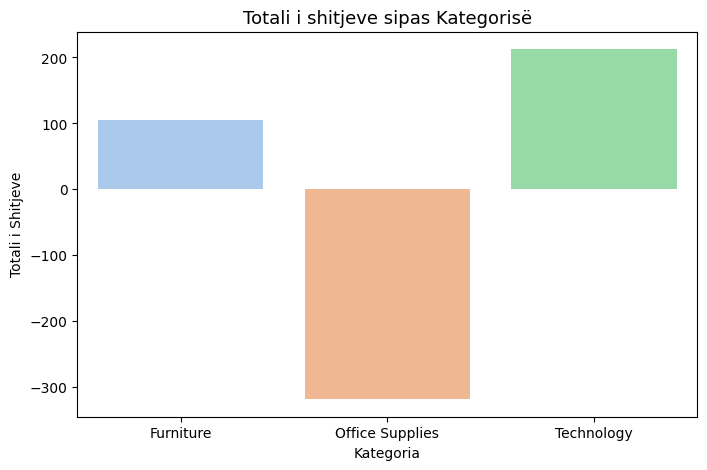

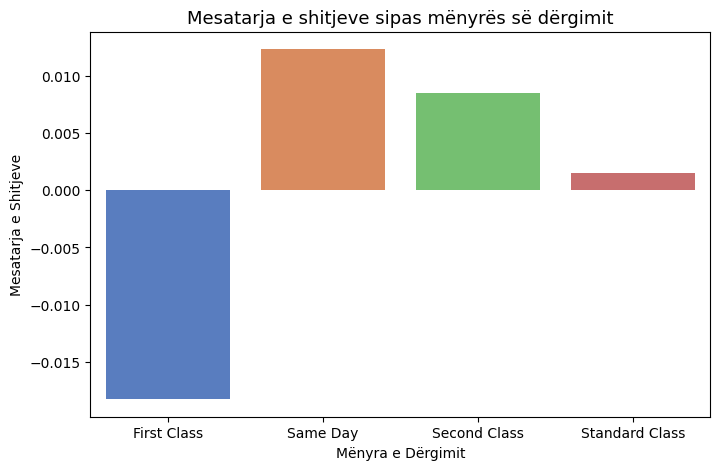

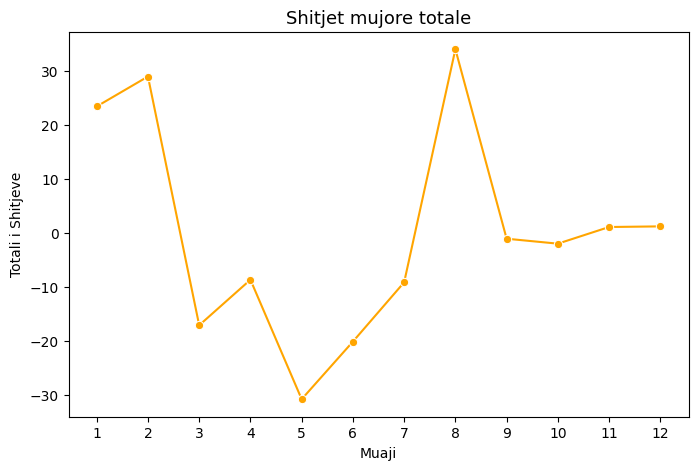

In [133]:
# 📊 Shitjet sipas kategorisë
plt.figure(figsize=(8,5))
sns.barplot(data=category_summary, x='Category', y='Sales', hue='Category', palette='pastel', legend=False)
plt.title('Totali i shitjeve sipas Kategorisë', fontsize=13)
plt.xlabel('Kategoria')
plt.ylabel('Totali i Shitjeve')
plt.show()

# 📦 Shitjet sipas mënyrës së dërgimit
shipmode_sales = df.groupby('Ship Mode')['Sales'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=shipmode_sales, x='Ship Mode', y='Sales', hue='Ship Mode', palette='muted', legend=False)
plt.title('Mesatarja e shitjeve sipas mënyrës së dërgimit', fontsize=13)
plt.xlabel('Mënyra e Dërgimit')
plt.ylabel('Mesatarja e Shitjeve')
plt.show()

# 📆 Shto kolonat për muajin dhe vitin e porosisë
df['Order_Month'] = df['Order Date'].dt.month
df['Order_Year'] = df['Order Date'].dt.year

# 📈 Shitjet sipas muajit
monthly_sales = df.groupby('Order_Month')['Sales'].sum().reset_index()
plt.figure(figsize=(8,5))
sns.lineplot(data=monthly_sales, x='Order_Month', y='Sales', marker='o', color='orange')
plt.title('Shitjet mujore totale', fontsize=13)
plt.xlabel('Muaji')
plt.ylabel('Totali i Shitjeve')
plt.xticks(range(1,13))
plt.show()


# Pjesa II : Detektimi i Përjashtuesve dhe Eksplorimi i të Dhënave

In [134]:
# Ngarkojmë dataset-in pas pastrimit nga Pjesa I
df = pd.read_csv("cleaned_superstore.csv")

# Kolonat numerike për analizë
num_cols = ['Sales', 'Delivery_Days']

### Statistika përmbledhëse

In [135]:
print(" Statistika përmbledhëse për kolonat numerike:")
display(df[num_cols].describe())


 Statistika përmbledhëse për kolonat numerike:


,Sales,Delivery_Days
count,2.676000e+03,2676.000000
mean,-4.049244e-17,107.010837
std,1.000187e+00,54.264484
min,-3.652993e-01,0.000000
25%,-3.377953e-01,61.000000
50%,-2.740086e-01,122.000000
75%,-4.786456e-02,153.000000
max,2.732924e+01,214.000000


### Detektimi i outlier-ëve

1) Me metodën IQR

In [136]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).any(axis=1)]
print(f"Numri i rreshtave me outliers (IQR): {len(outliers_iqr)}")
display(outliers_iqr.head())


Numri i rreshtave me outliers (IQR): 324


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Sales_binned,Sales_binary,Sales_original,PCA1,Delivery_Days,Order_Month,Order_Year
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",0.792189,3.0,1.0,731.940,0.792189,92,8,2017
3,36,CA-2017-117590,2017-08-12,2017-10-12,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,Phones,GE 30524EE4,1.370794,3.0,1.0,1097.544,1.370794,61,8,2017
5,68,CA-2015-106376,2015-05-12,2015-10-12,Standard Class,BS-11590,Brendan Sweed,Corporate,United States,Gilbert,...,Art,Hunt BOSTON Model 1606 High-Volume Electric Pe...,1.395293,3.0,1.0,1113.024,1.395293,153,5,2015
19,118,CA-2016-110457,2016-02-03,2016-06-03,Standard Class,DK-13090,Dave Kipp,Consumer,United States,Seattle,...,Tables,Hon Racetrack Conference Tables,0.880166,3.0,1.0,787.530,0.880166,121,2,2016
29,146,CA-2016-110744,2016-07-09,2016-12-09,Standard Class,HA-14920,Helen Andreada,Consumer,United States,Pasadena,...,Storage,Safco Industrial Wire Shelving,0.697217,3.0,1.0,671.930,0.697217,153,7,2016


2) Me Z-scores

In [137]:
z_scores = np.abs(stats.zscore(df[num_cols]))
outliers_z = df[(z_scores > 3).any(axis=1)]
print(f"Numri i rreshtave me outliers (Z-score): {len(outliers_z)}")
display(outliers_z.head())


Numri i rreshtave me outliers (Z-score): 31


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Sales_binned,Sales_binary,Sales_original,PCA1,Delivery_Days,Order_Month,Order_Year
38,166,CA-2015-139892,2015-08-09,2015-12-09,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,...,Machines,Lexmark MX611dhe Monochrome Laser Printer,12.547760,3.0,1.0,8159.9520,12.547760,122,8,2015
88,319,CA-2015-164973,2015-04-11,2015-09-11,Standard Class,NM-18445,Nathan Mautz,Home Office,United States,New York City,...,Machines,Canon imageCLASS MF7460 Monochrome Digital Las...,5.951528,3.0,1.0,3991.9800,5.951528,153,4,2015
103,354,CA-2017-129714,2017-01-09,2017-03-09,First Class,AB-10060,Adam Bellavance,Home Office,United States,New York City,...,Binders,GBC DocuBind P400 Electric Binding System,6.526309,3.0,1.0,4355.1680,6.526309,59,1,2017
110,400,CA-2017-108987,2017-08-09,2017-10-09,Second Class,AG-10675,Anna Gayman,Consumer,United States,Houston,...,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3.426151,3.0,1.0,2396.2656,3.426151,61,8,2017
185,684,US-2018-168116,2018-04-11,2018-04-11,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,...,Machines,Cubify CubeX 3D Printer Triple Head Print,12.294589,3.0,1.0,7999.9800,12.294589,0,4,2018


3) Me Grubbs’ test (për kolonën 'Sales')

In [138]:
def grubbs_test(series, alpha=0.05):
    """
    Kthen indeksin e vlerës më ekstreme sipas Grubbs' test.
    Kjo është për një vlerë ekstreme njëherësh.
    """
    n = len(series)
    mean_y = np.mean(series)
    std_y = np.std(series, ddof=1)
    
    # Llogarit devijimin absolut nga mesatarja
    abs_diff = np.abs(series - mean_y)
    max_deviation_index = abs_diff.argmax()
    
    # Vlera e testit G
    G_calculated = abs_diff[max_deviation_index] / std_y
    
    # G kritik nga formula e Grubbs
    t_critical = stats.t.ppf(1 - alpha / (2*n), n - 2)
    G_critical = ((n - 1)/np.sqrt(n)) * np.sqrt(t_critical**2 / (n - 2 + t_critical**2))
    
    # Kontrolli nëse është outlier
    if G_calculated > G_critical:
        return max_deviation_index
    else:
        return None

# Përdorimi
index_outlier = grubbs_test(df['Sales'], alpha=0.05)
if index_outlier is not None:
    print("Indeksi i outlier-it sipas Grubbs’ test:", index_outlier)
    display(df.loc[[index_outlier]])
else:
    print("Nuk ka outlier të konstatueshëm sipas Grubbs’ test.")


Indeksi i outlier-it sipas Grubbs’ test: 1883


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Sales_binned,Sales_binary,Sales_original,PCA1,Delivery_Days,Order_Month,Order_Year
1883,6827,CA-2017-118689,2017-02-10,2017-09-10,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,Copiers,Canon imageCLASS 2200 Advanced Copier,27.329241,3.0,1.0,17499.95,27.329241,212,2,2017


4)  Detektimi i Outlier-ëve me Isolation Forest

Numri total i rreshtave: 2676
Outlier të zbuluar nga Isolation Forest: 134
Rreshta pas heqjes së outlierëve: 2542


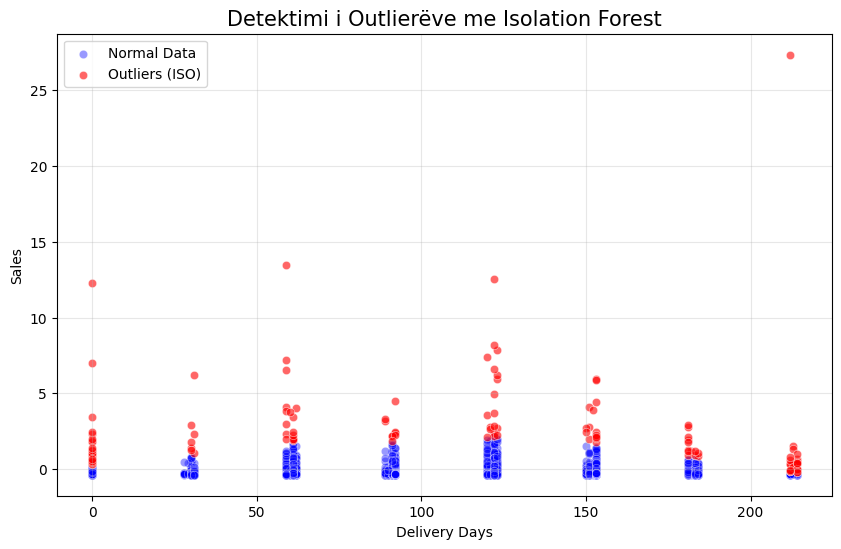

💾 Dataset-i i pastruar me Isolation Forest u ruajt si 'cleaned_superstore_iso.csv'


In [139]:
from sklearn.ensemble import IsolationForest

# Zgjedhim kolonat numerike që duam të analizojmë
features = ['Sales', 'Delivery_Days']

# Inicializimi i modelit
iso = IsolationForest(
    contamination=0.05,     # 5% e të dhënave do të konsiderohen outlier
    random_state=42,
    n_estimators=200,
    max_samples='auto'
)

# Trajnimi dhe parashikimi i outlier-ëve
df['anomaly'] = iso.fit_predict(df[features])

# Normal values = 1, Outliers = -1
df_outliers_iso = df[df['anomaly'] == -1]
df_clean_iso = df[df['anomaly'] == 1]

print("Numri total i rreshtave:", len(df))
print("Outlier të zbuluar nga Isolation Forest:", len(df_outliers_iso))
print("Rreshta pas heqjes së outlierëve:", len(df_clean_iso))

# ------------------------------------------
# Vizualizim i outlier-ëve me scatterplot
# ------------------------------------------
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_clean_iso,
    x='Delivery_Days',
    y='Sales',
    alpha=0.4,
    label='Normal Data',
    color='blue'
)
sns.scatterplot(
    data=df_outliers_iso,
    x='Delivery_Days',
    y='Sales',
    alpha=0.6,
    label='Outliers (ISO)',
    color='red'
)

plt.title("Detektimi i Outlierëve me Isolation Forest", fontsize=15)
plt.xlabel("Delivery Days")
plt.ylabel("Sales")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ------------------------------------------
# Ruajtja e dataset-it të pastruar me ISO
# ------------------------------------------
df_clean_iso.to_csv("cleaned_superstore_iso.csv", index=False)
print("💾 Dataset-i i pastruar me Isolation Forest u ruajt si 'cleaned_superstore_iso.csv'")


### Vizualizime për outlier-ët

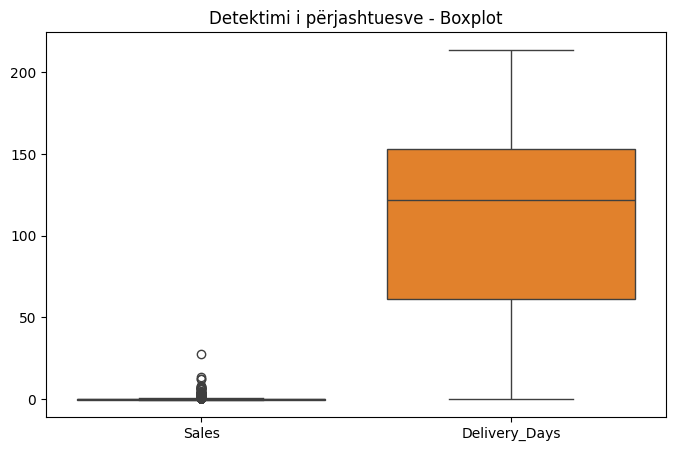

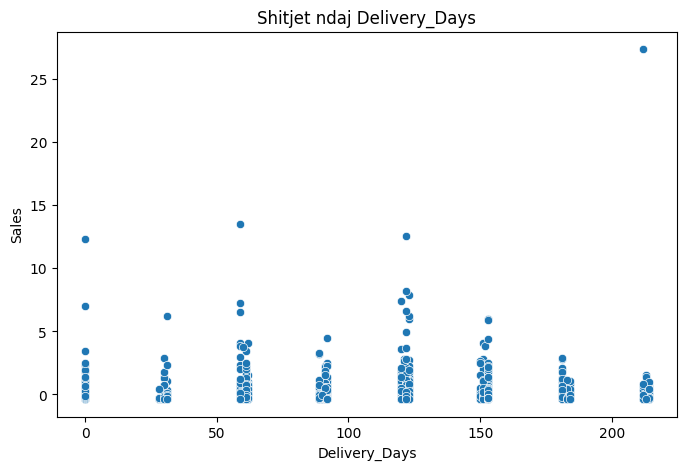

In [140]:
# Boxplot për kolonat numerike
plt.figure(figsize=(8,5))
sns.boxplot(data=df[num_cols])
plt.title('Detektimi i përjashtuesve - Boxplot')
plt.show()

# Scatter plot Sales vs Delivery_Days
plt.figure(figsize=(8,5))
sns.scatterplot(x='Delivery_Days', y='Sales', data=df)
plt.title('Shitjet ndaj Delivery_Days')
plt.show()


### Mënjanimi i outlier-ëve (Isolation Forest)

In [141]:
# Mbajmë vetëm të dhënat normale
df_clean_iso = df[df['anomaly'] == 1].copy()

print("Numri i rreshtave pas mënjanimit të outlier-ëve:", len(df_clean_iso))

# Ruajtja në file
df_clean_iso.to_csv("cleaned_superstore_iso.csv", index=False)

print("💾 Dataset-i final pa outlier-a u ruajt si 'cleaned_superstore_iso.csv'")


Numri i rreshtave pas mënjanimit të outlier-ëve: 2542
💾 Dataset-i final pa outlier-a u ruajt si 'cleaned_superstore_iso.csv'


### Eksplorimi multivariante

1) Korelacioni ndërmjet kolonave numerike

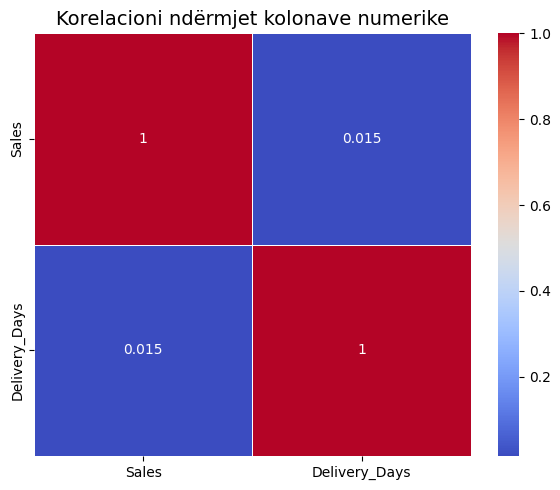

In [142]:
plt.figure(figsize=(6,5))
sns.heatmap(
    df_clean_iso[num_cols].corr(),
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='white'
)
plt.title('Korelacioni ndërmjet kolonave numerike', fontsize=14)
plt.tight_layout()
plt.show()


2) Pairplot

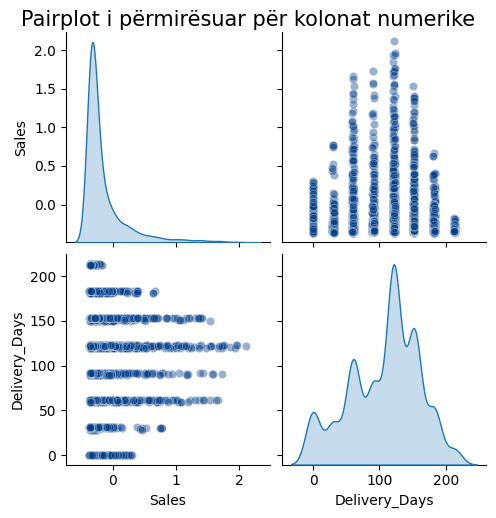

In [143]:
sns.pairplot(
    df_clean_iso[['Sales','Delivery_Days']],
    diag_kind='kde',
    plot_kws={'alpha': 0.4, 'color': '#023e8a'}
)
plt.suptitle("Pairplot i përmirësuar për kolonat numerike", y=1.02, fontsize=15)
plt.show()


3) Boxplot sipas kategorive

C:\Users\HP\AppData\Local\Temp\ipykernel_14516\1183095418.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


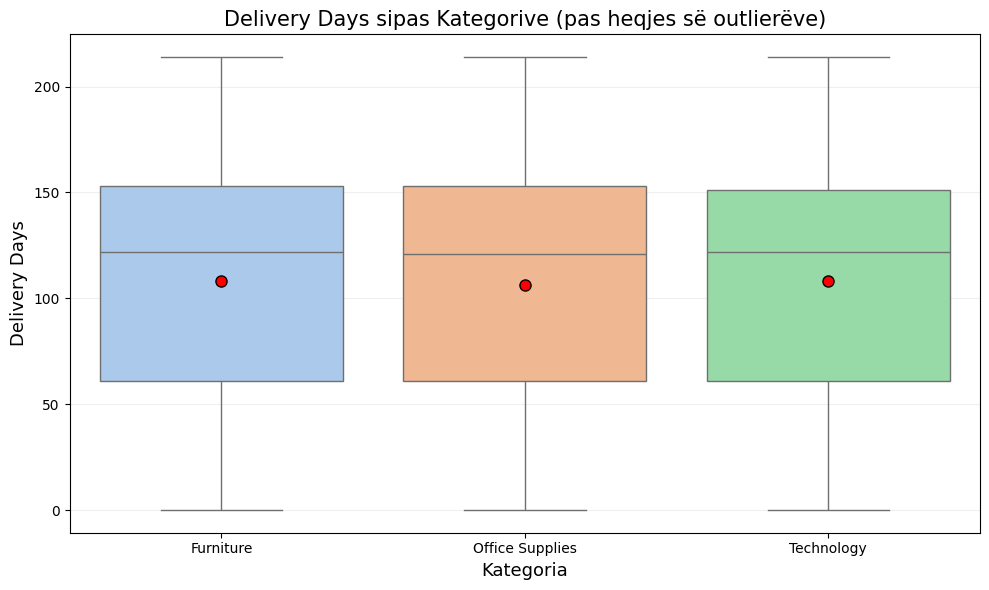

In [144]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df_clean_iso,
    x='Category',
    y='Delivery_Days',
    palette='pastel',
    showmeans=True,
    meanprops={"marker": "o",
               "markerfacecolor": "red",
               "markeredgecolor": "black",
               "markersize": "8"}
)

plt.title("Delivery Days sipas Kategorive (pas heqjes së outlierëve)", fontsize=15)
plt.xlabel("Kategoria", fontsize=13)
plt.ylabel("Delivery Days", fontsize=13)

plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()


4) Scatterplot Sales vs Delivery_Days


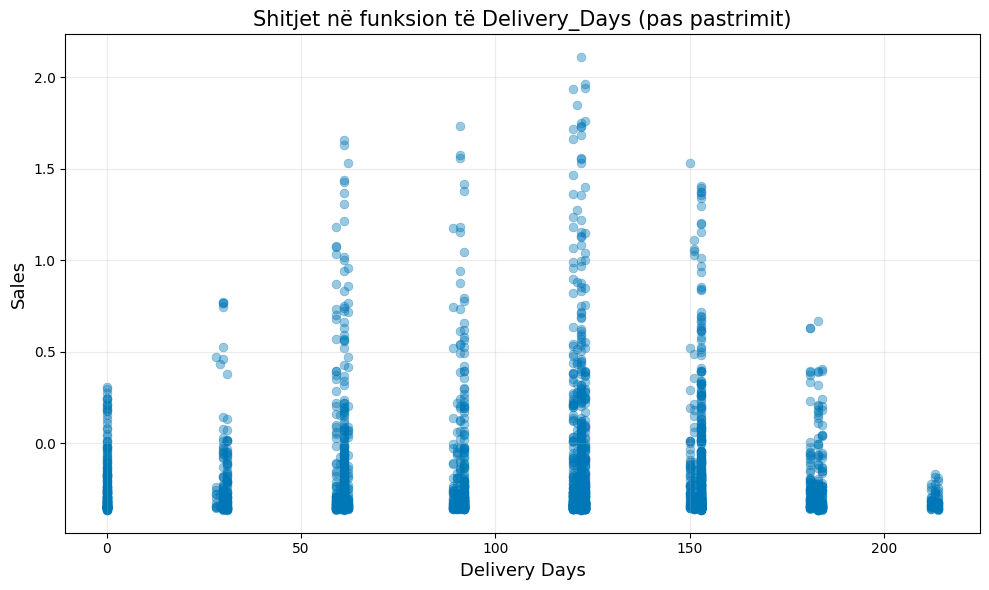

In [145]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_clean_iso,
    x='Delivery_Days',
    y='Sales',
    alpha=0.4,                   # transparencë
    s=40,                        # madhësia e pikave
    color="#0077b6",             # ngjyrë profesionale
    edgecolor=None
)

plt.title("Shitjet në funksion të Delivery_Days (pas pastrimit)", fontsize=15)
plt.xlabel("Delivery Days", fontsize=13)
plt.ylabel("Sales", fontsize=13)

plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()


### Ruajtja e dataset-it pas Pjesës II

In [ ]:
df_clean_iso.to_csv("cleaned_superstore_iso.csv", index=False)
print("💾 Dataset-i pas heqjes së outlier-eve u ruajt si 'cleaned_superstore_iso.csv'")


💾 Dataset-i pas heqjes së outlier-eve u ruajt si 'cleaned_superstore_no_outliers.csv'
